### Часть 1. Первичная обработка данных.

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Имена столбцов для наших данных:

col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']


### Загружаем обучающие данные (train data)

In [8]:
# Загружаем обучающие данные
# где df_train_raw - сырые данные (необработанные)
df_train_raw = pd.read_csv('./data/PM_train.txt', sep = ' ', header=None)
df_train_raw.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

In [9]:
# Убираем столбцы с пустыми данными из df_train_raw
df_train_raw.drop([26, 27], axis=1, inplace=True)

In [10]:
# Присваиваем наименования столбцов
df_train_raw.columns = col_names
df_train_raw.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

In [11]:
# Взглянем на основную статистику обучающих данных
df_train_raw.describe()

id         cycle      setting1      setting2  setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862     -0.000009      0.000002     100.0   
std       29.227633     68.880990      0.002187      0.000293       0.0   
min        1.000000      1.000000     -0.008700     -0.000600     100.0   
25%       26.000000     52.000000     -0.001500     -0.000200     100.0   
50%       52.000000    104.000000      0.000000      0.000000     100.0   
75%       77.000000    156.000000      0.001500      0.000300     100.0   
max      100.000000    362.000000      0.008700      0.000600     100.0   

             s1            s2            s3            s4            s5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

                s12           s13           s14           s15           s16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.387812e-17   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

                s17      s18      s19           s20           s21  
count  20631.000000  20631.0  20631.0  20631.000000  20631.000000  
mean     393.210654   2388.0    100.0     38.816271     23.289705  
std        1.548763      0.0      0.0      0.180746      0.108251  
min      388.000000   2388.0    100.0     38.140000     22.894200  
25%      392.000000   2388.0    100.0     38.700000     23.221800  
50%      393.000000   2388.0    100.0     38.830000     23.297900  
75%      394.000000   2388.0    100.0     38.950000     23.366800  
max      400.000000   2388.0    100.0     39.430000     23.618400  

[8 rows x 26 columns]

Всего насчитывается 100 двигателей. Каждый двигатель имеет от 1 до 362 циклов (в среднем 108 циклов на двигатель). Последний цикл для каждого двигателя представляет цикл, в котором произошел сбой.

In [12]:
# Промерим типы данных 
df_train_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

Все столбцы данных являются числовыми.

In [13]:
# Проверим на NaN значения
df_train_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

Никаких пропущенных значений. Это чистый набор данных!

### Загружаем тестировочные данные (test data)

In [14]:
# Загружаем тренировочные данные
df_test_raw = pd.read_csv('./data/PM_test.txt', sep=' ', header=None)
df_test_raw.drop([26, 27], axis=1, inplace=True)
df_test_raw.columns = col_names
df_test_raw.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0   

     s20      s21  
0  38.86  23.3735  
1  39.02  23.3916  
2  39.08  23.4166  
3  39.00  23.3737  
4  38.99  23.4130  

[5 rows x 26 columns]

In [15]:
# Взглянем на статистику по тестировочным данным
df_test_raw.describe()

id         cycle      setting1      setting2  setting3  \
count  13096.000000  13096.000000  13096.000000  13096.000000   13096.0   
mean      51.543907     76.836515     -0.000011      0.000004     100.0   
std       28.289423     53.057749      0.002203      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       28.000000     33.000000     -0.001500     -0.000200     100.0   
50%       52.000000     69.000000     -0.000000     -0.000000     100.0   
75%       76.000000    113.000000      0.001500      0.000300     100.0   
max      100.000000    303.000000      0.007800      0.000700     100.0   

             s1            s2            s3            s4            s5  ...  \
count  13096.00  13096.000000  13096.000000  13096.000000  1.309600e+04  ...   
mean     518.67    642.475088   1588.099204   1404.735362  1.462000e+01  ...   
std        0.00      0.400899      5.003274      6.688309  1.776425e-15  ...   
min      518.67    641.130000   1569.040000   1384.390000  1.462000e+01  ...   
25%      518.67    642.197500   1584.600000   1399.950000  1.462000e+01  ...   
50%      518.67    642.460000   1587.990000   1404.440000  1.462000e+01  ...   
75%      518.67    642.740000   1591.362500   1409.050000  1.462000e+01  ...   
max      518.67    644.300000   1607.550000   1433.360000  1.462000e+01  ...   

                s12           s13           s14           s15           s16  \
count  13096.000000  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean     521.747724   2388.071025   8138.947817      8.425844  3.000000e-02   
std        0.559627      0.056934     10.188605      0.029009  1.040874e-17   
min      519.380000   2387.890000   8108.500000      8.332800  3.000000e-02   
25%      521.380000   2388.030000   8132.310000      8.405600  3.000000e-02   
50%      521.780000   2388.070000   8138.390000      8.424900  3.000000e-02   
75%      522.150000   2388.110000   8144.360000      8.444300  3.000000e-02   
max      523.760000   2388.320000   8220.480000      8.541400  3.000000e-02   

                s17      s18      s19           s20           s21  
count  13096.000000  13096.0  13096.0  13096.000000  13096.000000  
mean     392.571625   2388.0    100.0     38.892502     23.335743  
std        1.233577      0.0      0.0      0.141681      0.084120  
min      389.000000   2388.0    100.0     38.310000     22.935400  
25%      392.000000   2388.0    100.0     38.800000     23.281600  
50%      393.000000   2388.0    100.0     38.900000     23.339200  
75%      393.000000   2388.0    100.0     38.990000     23.393600  
max      397.000000   2388.0    100.0     39.410000     23.641900  

[8 rows x 26 columns]

Как и в случае с обучающими данными, существует 100 двигателей, каждый двигатель имеет от 1 до 303 циклов (в среднем 76 циклов на двигатель).
Но на этот раз цикл сбоя предусмотрен не был.
События сбоя для тестовых данных - оставшиеся циклы до сбоя (TTF) - были предоставлены в отдельном файле истинности (truth_data).

### Загружаем правдивые данные (truth data)

In [16]:
# Загружаем правдивые данные (truth data) - актуальный "ttf" для тестировочных данных (test data)
df_truth = pd.read_csv('./data/PM_truth.txt', sep=' ', header=None)
df_truth.drop([1], axis=1, inplace=True)
df_truth.columns = ['ttf']
df_truth.head()

ttf
0  112
1   98
2   69
3   82
4   91

In [17]:
# Взглянем на статистику по правдивым данным (truth data)
df_test_raw.describe()

id         cycle      setting1      setting2  setting3  \
count  13096.000000  13096.000000  13096.000000  13096.000000   13096.0   
mean      51.543907     76.836515     -0.000011      0.000004     100.0   
std       28.289423     53.057749      0.002203      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       28.000000     33.000000     -0.001500     -0.000200     100.0   
50%       52.000000     69.000000     -0.000000     -0.000000     100.0   
75%       76.000000    113.000000      0.001500      0.000300     100.0   
max      100.000000    303.000000      0.007800      0.000700     100.0   

             s1            s2            s3            s4            s5  ...  \
count  13096.00  13096.000000  13096.000000  13096.000000  1.309600e+04  ...   
mean     518.67    642.475088   1588.099204   1404.735362  1.462000e+01  ...   
std        0.00      0.400899      5.003274      6.688309  1.776425e-15  ...   
min      518.67    641.130000   1569.040000   1384.390000  1.462000e+01  ...   
25%      518.67    642.197500   1584.600000   1399.950000  1.462000e+01  ...   
50%      518.67    642.460000   1587.990000   1404.440000  1.462000e+01  ...   
75%      518.67    642.740000   1591.362500   1409.050000  1.462000e+01  ...   
max      518.67    644.300000   1607.550000   1433.360000  1.462000e+01  ...   

                s12           s13           s14           s15           s16  \
count  13096.000000  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean     521.747724   2388.071025   8138.947817      8.425844  3.000000e-02   
std        0.559627      0.056934     10.188605      0.029009  1.040874e-17   
min      519.380000   2387.890000   8108.500000      8.332800  3.000000e-02   
25%      521.380000   2388.030000   8132.310000      8.405600  3.000000e-02   
50%      521.780000   2388.070000   8138.390000      8.424900  3.000000e-02   
75%      522.150000   2388.110000   8144.360000      8.444300  3.000000e-02   
max      523.760000   2388.320000   8220.480000      8.541400  3.000000e-02   

                s17      s18      s19           s20           s21  
count  13096.000000  13096.0  13096.0  13096.000000  13096.000000  
mean     392.571625   2388.0    100.0     38.892502     23.335743  
std        1.233577      0.0      0.0      0.141681      0.084120  
min      389.000000   2388.0    100.0     38.310000     22.935400  
25%      392.000000   2388.0    100.0     38.800000     23.281600  
50%      393.000000   2388.0    100.0     38.900000     23.339200  
75%      393.000000   2388.0    100.0     38.990000     23.393600  
max      397.000000   2388.0    100.0     39.410000     23.641900  

[8 rows x 26 columns]

Чтобы получить значимые тестовые данные, нам нужно объединить истинные данные (TTF) с последним циклом для каждого двигателя в тестовых данных. 
Это даст нам тестовый набор из 100 двигателей с их данными TTF. Мы сделаем это позже, когда создадим регрессионные и классификационные метки как для обучающих, так и для тестовых данных.
Но теперь давайте добавим некоторые функции для сглаживания показаний датчиков: скользящее среднее и скользящее стандартное отклонение.

### Извлечение признаков (features)

Создадим вспомогательную функцию для создания агрегированных данных.
Агрегированные данные характеризуют суммарную историческую активность по каждому двигателю. Для каждого из 21 датчика создаются два типа агрегированных данных:
	a1-a21: скользящее среднее значений датчиков за последние W циклов;
	sd1-sd21: стандартное отклонение значений датчиков за последние W циклов.


In [18]:
def add_features(df_in, rolling_win_size):
    """
    Добавляет скользящее среднее и скользящее стандартное отклонение для считывания датчиков с использованием фиксированного размера скользящего окна.

    Args:
        df_in (dataframe): Входной dataframe для обработки (обучающий или тестовый)
        rolling_win_size (int): Размер окна, количество циклов для применения скользящей функции

    Returns:
        dataframe: содержит входной dataframe с дополнительным скользящим средним и стандартным отклонением для каждого сенсора
    """

    # Список столбцов сенсоров
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    
    # Формирование списка новых столбцов для средних значений
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    
    # Формирование списка новых столбцов для стандартных отклонений
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]

    # Создание пустого dataframe для записи результатов
    df_out = pd.DataFrame()

    # Установка размера окна скользящего среднего
    ws = rolling_win_size

    # Вычисление скользящих статистик для каждого идентификатора двигателя
    for m_id in pd.unique(df_in.id):

        # Получение поднабора данных для каждого двигателя
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

        # Вычисление скользящего среднего для поднабора данных
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols

        # Вычисление скользящего стандартного отклонения для поднабора данных
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols

        # Объединение двух новых поднаборов данных со статистикой с данными о двигателе
        new_ftrs = pd.concat([df_engine, av, sd], axis=1)

        # Добавление новых строк с признаками в выходной dataframe
        df_out = pd.concat([df_out, new_ftrs])

    # Возврат обновленного dataframe с добавленными скользящими средними и стандартными отклонениями
    return df_out

Создадим вспомогательную функцию для добавления меток регрессии и классификации к обучающим данным.

In [19]:
def prepare_train_data(df_in, period):
    """
    Добавляет регрессионные и классификационные метки к обучающим данным.

    Регрессионная метка: ttf (время до отказа) = каждый номер цикла для двигателя, вычитанный из последнего номера цикла того же двигателя
    Метка бинарной классификации: label_bnc = если ttf <= параметра period, тогда 1, иначе 0 (значения = 0, 1)
    Метка многоклассовой классификации: label_mcc = 2, если ttf <= 0.5 * параметра period, 1, если ttf <= period, иначе 0

    Args:
        df_in (dataframe): Входные данные для обучения
        period (int): Количество циклов для сегментации TTF. Используется для получения классификационных меток

    Returns:
        dataframe: Входной dataframe с добавленными регрессионными и классификационными метками
    """

    # Создание регрессионной метки

    # Создание dataframe, содержащего последний цикл для каждого двигателя в наборе данных
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']

    # Добавление времени до отказа ttf в качестве нового столбца - регрессионная метка
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace=True)

    # Создание метки бинарной классификации
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)

    # Создание метки многоклассовой классификации
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_in

Создадим вспомогательную функцию для добавления меток регрессии и классификации к обучающим данным

In [20]:
def prepare_test_data(df_test_in, df_truth_in, period):
    """
    Добавляет регрессионные и классификационные метки к тестовым данным.

    Регрессионная метка: ttf (время до отказа) = извлечь последний цикл для каждого двигателя, а затем объединить запись с данными правды
    Метка бинарной классификации: label_bnc = если ttf <= параметра period, тогда 1, иначе 0 (значения = 0, 1)
    Метка многоклассовой классификации: label_mcc = 2, если ttf <= 0.5 * параметра period, 1, если ttf <= period, иначе 0

    Args:
        df_test_in (dataframe): Входные тестовые данные
        df_truth_in (dataframe): Данные правды
        period (int): Количество циклов для сегментации TTF. Используется для получения классификационных меток

    Returns:
        dataframe: Входной dataframe с добавленными регрессионными и классификационными метками
    """

    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
    
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')

    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace=True)
    
    df_test_in.reset_index(drop=True, inplace=True)
    
    df_test_in = pd.concat([df_test_in, df_truth_in], axis=1)
    
    # Создание метки бинарной классификации
    df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    # Создание метки многоклассовой классификации
    df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

С помощью этих функций давайте подготовим обучающие и тестовые данные, добавив функции и метки

### Подготовка обучающих данных (Training Data):

In [21]:
# Добавляем агрегированные данные к обучающим данным

# PS: здесь период (5) необходим для расчета агрегированных параметров на промежутке времени

df_train_fx = add_features(df_train_raw, 5)
df_train_fx.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      sd12      sd13      sd14      sd15  sd16      sd17  sd18  \
0  14.62  ...  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   0.0   
1  14.62  ...  0.438406  0.035355  5.041671  0.008697   0.0  0.000000   0.0   
2  14.62  ...  0.404475  0.026458  3.717450  0.007640   0.0  1.154701   0.0   
3  14.62  ...  0.495950  0.029439  3.050906  0.028117   0.0  1.000000   0.0   
4  14.62  ...  0.432574  0.025884  2.651326  0.025953   0.0  1.095445   0.0   

   sd19      sd20      sd21  
0   0.0  0.000000  0.000000  
1   0.0  0.042426  0.003253  
2   0.0  0.055076  0.044573  
3   0.0  0.076322  0.037977  
4   0.0  0.073621  0.033498  

[5 rows x 68 columns]

In [22]:
# добавляем метки для обучающих данных используя период в 30 циклов для классификации

# PS: здесь период (30) нужен для определения временного окна для бинарной и мульти-классовой классификации (W0, W1)

df_train = prepare_train_data (df_train_fx, 30)
df_train.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      sd15  sd16      sd17  sd18  sd19      sd20      sd21  ttf  \
0  14.62  ...  0.000000   0.0  0.000000   0.0   0.0  0.000000  0.000000  191   
1  14.62  ...  0.008697   0.0  0.000000   0.0   0.0  0.042426  0.003253  190   
2  14.62  ...  0.007640   0.0  1.154701   0.0   0.0  0.055076  0.044573  189   
3  14.62  ...  0.028117   0.0  1.000000   0.0   0.0  0.076322  0.037977  188   
4  14.62  ...  0.025953   0.0  1.095445   0.0   0.0  0.073621  0.033498  187   

   label_bnc  label_mcc  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 71 columns]

### Подготовка тестировочных данных (test data)

In [23]:
# Добавляем агрегированные данные к тестировочным данным

# PS: здесь период (5) необходим для расчета агрегированных параметров на промежутке времени

df_test_fx = add_features(df_test_raw, 5)
df_test_fx.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...      sd12      sd13      sd14      sd15  sd16      sd17  sd18  \
0  14.62  ...  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   0.0   
1  14.62  ...  0.311127  0.021213  9.948992  0.017607   0.0  0.707107   0.0   
2  14.62  ...  0.220681  0.017321  7.179807  0.032155   0.0  0.577350   0.0   
3  14.62  ...  0.337182  0.015000  5.890096  0.027781   0.0  0.957427   0.0   
4  14.62  ...  0.329742  0.014142  5.222300  0.024080   0.0  1.303840   0.0   

   sd19      sd20      sd21  
0   0.0  0.000000  0.000000  
1   0.0  0.113137  0.012799  
2   0.0  0.113725  0.021642  
3   0.0  0.093095  0.020353  
4   0.0  0.080623  0.020672  

[5 rows x 68 columns]

In [24]:
# добавляем метки для тестировочных данных используя период в 30 циклов для классификации

# PS: здесь период (30) нужен для определения временного окна для бинарной и мульти-классовой классификации (W0, W1)

df_test = prepare_test_data(df_test_fx, df_truth, 30)
df_test.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1     31   -0.0006    0.0004     100.0  518.67  642.58  1581.22  1398.91   
1   2     49    0.0018   -0.0001     100.0  518.67  642.55  1586.59  1410.83   
2   3    126   -0.0016    0.0004     100.0  518.67  642.88  1589.75  1418.89   
3   4    106    0.0012    0.0004     100.0  518.67  642.78  1594.53  1406.88   
4   5     98   -0.0013   -0.0004     100.0  518.67  642.27  1589.94  1419.36   

      s5  ...      sd15  sd16      sd17  sd18  sd19      sd20      sd21  ttf  \
0  14.62  ...  0.021174   0.0  0.707107   0.0   0.0  0.124016  0.025037  112   
1  14.62  ...  0.011429   0.0  1.095445   0.0   0.0  0.069785  0.027820   98   
2  14.62  ...  0.030924   0.0  0.836660   0.0   0.0  0.143631  0.018966   69   
3  14.62  ...  0.021249   0.0  1.341641   0.0   0.0  0.126372  0.021106   82   
4  14.62  ...  0.009627   0.0  0.547723   0.0   0.0  0.091924  0.101100   91   

   label_bnc  label_mcc  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 71 columns]

### Часть 2. Предварительный анализ данных

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from pandas.plotting import scatter_matrix

In [26]:
# исключаем идентификатор двигателя и номер цикла из входных параметров:

features = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

<Axes: title={'center': 'Стандартное отклонение признаков'}>

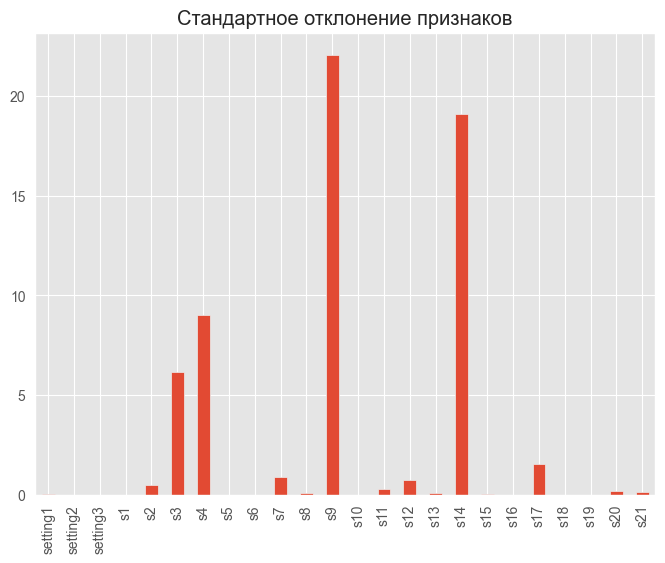

In [27]:
# строим график и сравниваем стандартное отклонение входных параметров:

df_train[features].std().plot(kind='bar', figsize=(8,6), title="Стандартное отклонение признаков")

<Axes: title={'center': 'Стандартное отклонение признаков (log)'}>

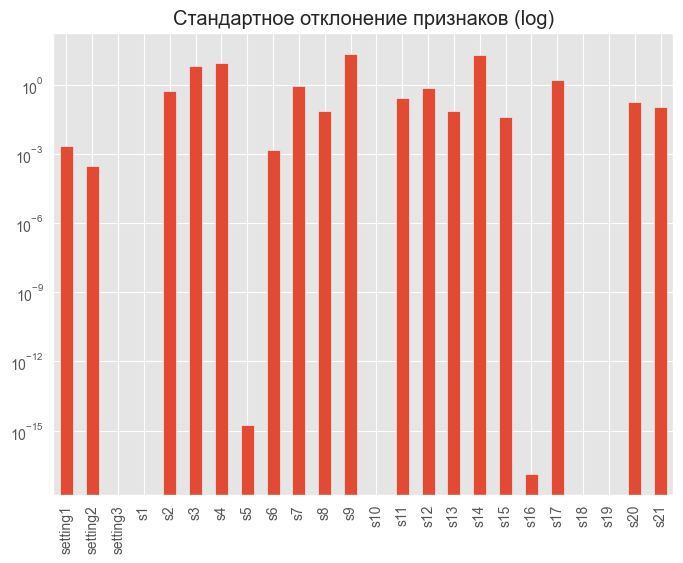

In [28]:
# строим график и сравниваем логарифмическое стандартное отклонение входных параметров:

df_train[features].std().plot(kind='bar', figsize=(8,6), logy=True,title="Стандартное отклонение признаков (log)")

In [29]:
# Получаем упорядоченный список основных функций дисперсии:

features_top_var = df_train[features].std().sort_values(ascending=False)
features_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s5          1.776400e-15
s16         1.387812e-17
s1          0.000000e+00
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
s10         0.000000e+00
dtype: float64

In [30]:
# получаем упорядоченный список признаков корреляции с регрессионной меткой ttf

df_train[features].corrwith(df_train.ttf).sort_values(ascending=False)

c:\users\danil\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\users\danil\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -5.849749e-16
s5         -5.849749e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [31]:
# список признаков, имеющих низкую корреляцию или ее отсутствие с регрессионной меткой ttf и очень низкую дисперсию или ее отсутствие вообще
# Эти объекты будут удалены при выборе объекта

low_cor_features = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_train[low_cor_features].describe()

setting3        s1      s10      s18      s19           s16  \
count   20631.0  20631.00  20631.0  20631.0  20631.0  2.063100e+04   
mean      100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
std         0.0      0.00      0.0      0.0      0.0  1.387812e-17   
min       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
25%       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
50%       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
75%       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
max       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   

                 s5      setting2      setting1  
count  2.063100e+04  20631.000000  20631.000000  
mean   1.462000e+01      0.000002     -0.000009  
std    1.776400e-15      0.000293      0.002187  
min    1.462000e+01     -0.000600     -0.008700  
25%    1.462000e+01     -0.000200     -0.001500  
50%    1.462000e+01      0.000000      0.000000  
75%    1.462000e+01      0.000300      0.001500  
max    1.462000e+01      0.000600      0.008700

In [32]:
# список признаков, имеющих высокую корреляцию с регрессионной меткой ttf

correl_features = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

df_train[correl_features].describe()

s12            s7           s21           s20            s6  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean     521.413470    553.367711     23.289705     38.816271     21.609803   
std        0.737553      0.885092      0.108251      0.180746      0.001389   
min      518.690000    549.850000     22.894200     38.140000     21.600000   
25%      520.960000    552.810000     23.221800     38.700000     21.610000   
50%      521.480000    553.440000     23.297900     38.830000     21.610000   
75%      521.950000    554.010000     23.366800     38.950000     21.610000   
max      523.380000    556.060000     23.618400     39.430000     21.610000   

                s14            s9           s13            s8            s3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    8143.752722   9065.242941   2388.096152   2388.096652   1590.523119   
std       19.076176     22.082880      0.071919      0.070985      6.131150   
min     8099.940000   9021.730000   2387.880000   2387.900000   1571.040000   
25%     8133.245000   9053.100000   2388.040000   2388.050000   1586.260000   
50%     8140.540000   9060.660000   2388.090000   2388.090000   1590.100000   
75%     8148.310000   9069.420000   2388.140000   2388.140000   1594.380000   
max     8293.720000   9244.590000   2388.560000   2388.560000   1616.910000   

                s17            s2           s15            s4           s11  
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000  
mean     393.210654    642.680934      8.442146   1408.933782     47.541168  
std        1.548763      0.500053      0.037505      9.000605      0.267087  
min      388.000000    641.210000      8.324900   1382.250000     46.850000  
25%      392.000000    642.325000      8.414900   1402.360000     47.350000  
50%      393.000000    642.640000      8.438900   1408.040000     47.510000  
75%      394.000000    643.000000      8.465600   1414.555000     47.700000  
max      400.000000    644.530000      8.584800   1441.490000     48.530000

[‘s12’, ‘s7’, ‘s21’, ‘s20’, ‘s6’, ‘s14’, ‘s9’, ‘s13’, ‘s8’, ‘s3’, ‘s17’, ‘s2’, ‘s15’, ‘s4’, ‘s11’] могут быть мишенью для выбора объектов во время моделирования, поскольку их корреляция с TTF выше, чем у других объектов.
Давайте отобразим эту корреляцию на тепловой карте

In [33]:
# добавим метку регрессии "ttf" в список признаков с высокой степенью соответствия

correl_features = correl_features + ['ttf']

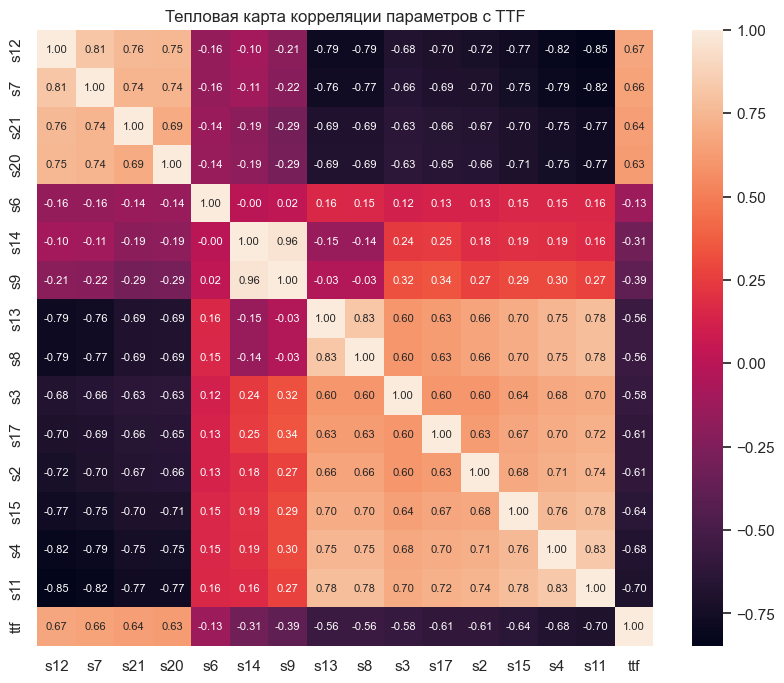

In [34]:
# строим тепловую карту для отображения корреляции +ve и -ve между объектами и меткой регрессии:

import seaborn as sns
cm = np.corrcoef(df_train[correl_features].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_features, xticklabels=correl_features)
plt.title('Тепловая карта корреляции параметров с TTF')
plt.show()

Существует очень высокая корреляция (> 0,8) между некоторыми признаками: (s14, s9), (s11, s4), (s11, s7), (s11, s12), (s4, s12), (s8,s13), (s7, s12)
Это может снизить производительность некоторых алгоритмов ML.

Итак, некоторые из вышеперечисленных функций будут удалены при выборе функции

In [35]:
# сбросить исходную тему matplotlib

sns.reset_orig()

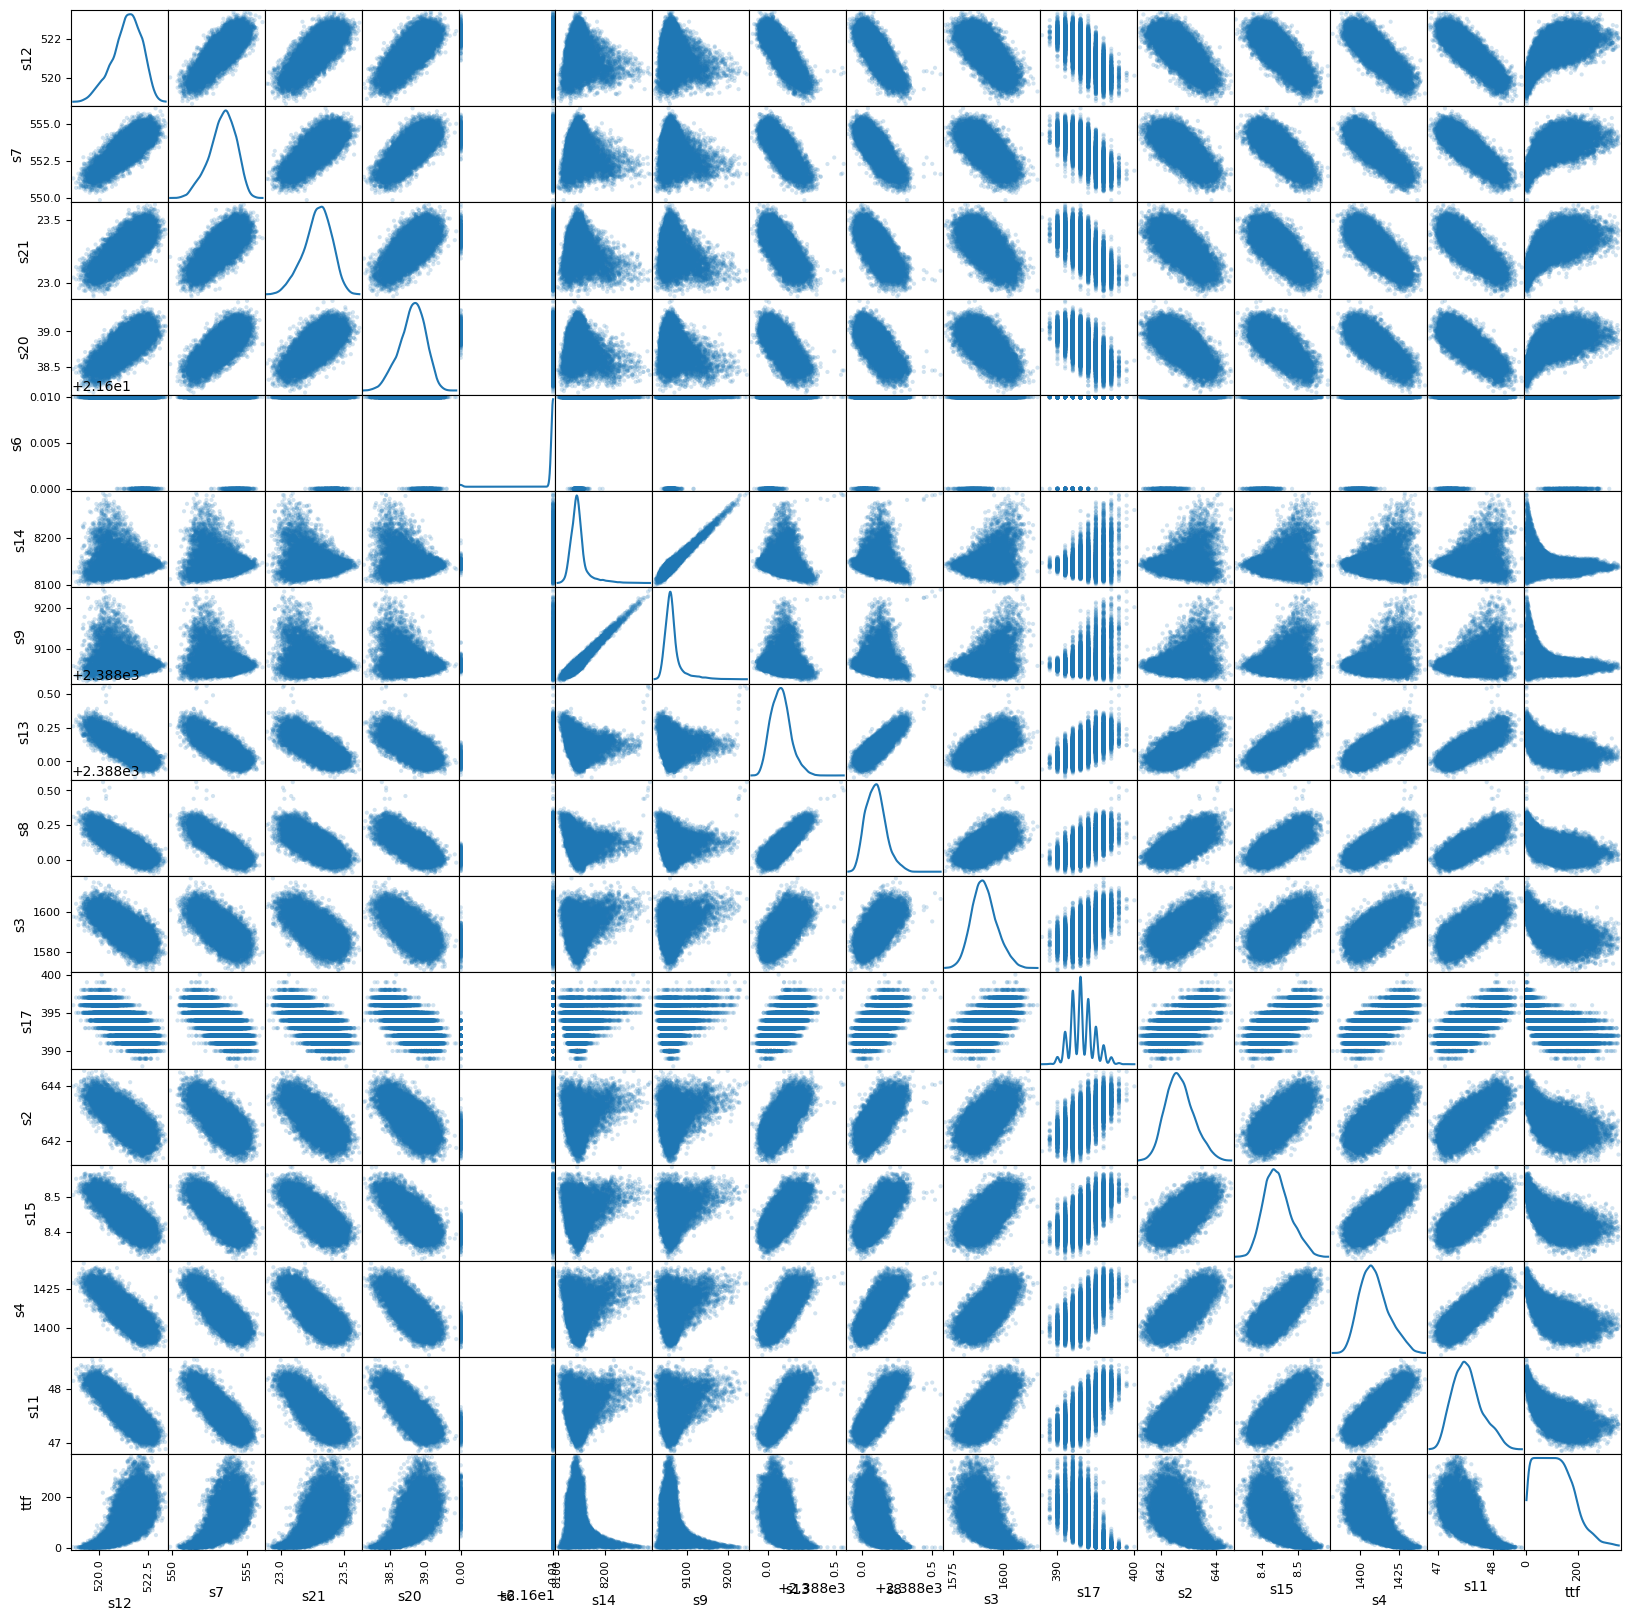

In [36]:
# создаем матрицу рассеяния для отображения взаимосвязей и распределения между объектами и меткой регрессии

# Построение матрицы рассеяния
pd.plotting.scatter_matrix(df_train[correl_features], alpha=0.2, figsize=(20, 20), diagonal='kde')

plt.show()

Большинство функций имеют нормальное распределение, что положительно влияет на алгоритмы машинного обучения.

Большинство функций имеют нелинейную взаимосвязь с регрессионной меткой ttf, поэтому использование полиномиальных моделей может привести к лучшим результатам.

Давайте создадим вспомогательную функцию, чтобы облегчить изучение каждой функции в отдельности:

In [37]:
def explore_col(s, e):
    """
    Построение 4 графиков для одного временного ряда.

    plot1: histogram / гистограмма
    plot2: boxplot / прямоугольный график
    plot3: line plot (time series over cycle) / линейный график (временной ряд по циклу)
    plot4: scatter plot vs. regression label ttf / точечный график в сравнении с регрессионной меткой TTF

    Args:
        s (str): Имя столбца признака для построения графиков.
        e (int): Количество случайных двигателей для отображения на графике 3. Диапазон от 1 до 100, 0: все двигатели, >100: все двигатели.

    Returns:
        plots
    """
    
    fig = plt.figure(figsize=(10, 8))

    # Построение гистограммы
    sub1 = fig.add_subplot(221) 
    sub1.set_title(s + ' гистограмма') 
    sub1.hist(df_train[s])

    # Построение boxplot
    sub2 = fig.add_subplot(222)
    sub2.set_title(s + ' boxplot')
    sub2.boxplot(df_train[s])

    # Генерация случайных двигателей для построения временного ряда
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_train.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)

    # Построение временного ряда для выбранных двигателей
    sub3 = fig.add_subplot(223)
    sub3.set_title('временной ряд: ' + s + ' / цикл')
    sub3.set_xlabel('цикл')
    for i in select_engines:
        df = df_train[['cycle', s]][df_train.id == i]
        sub3.plot(df['cycle'], df[s])

    # Построение диаграммы рассеяния для выбранного признака относительно метки регрессии
    sub4 = fig.add_subplot(224)
    sub4.set_title("диаграмма рассеяния: " + s + " / ttf (метка регрессии)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_train['ttf'], df_train[s])

    # Показать графики
    plt.tight_layout()
    plt.show()

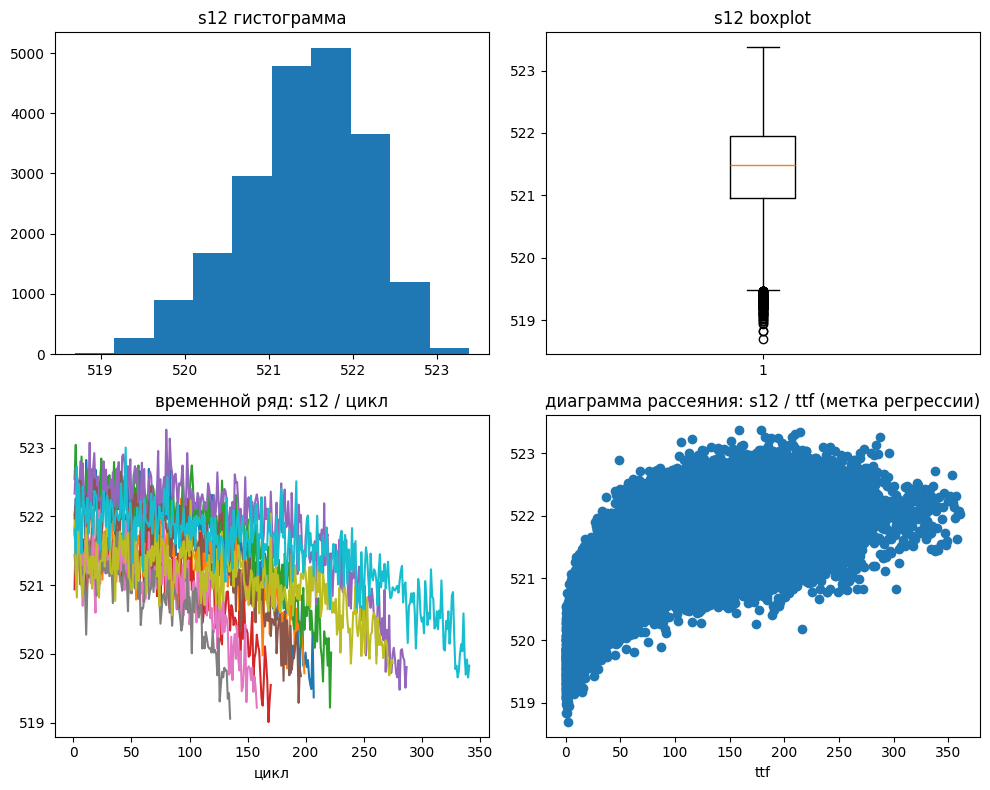

In [38]:
explore_col("s12", 10)

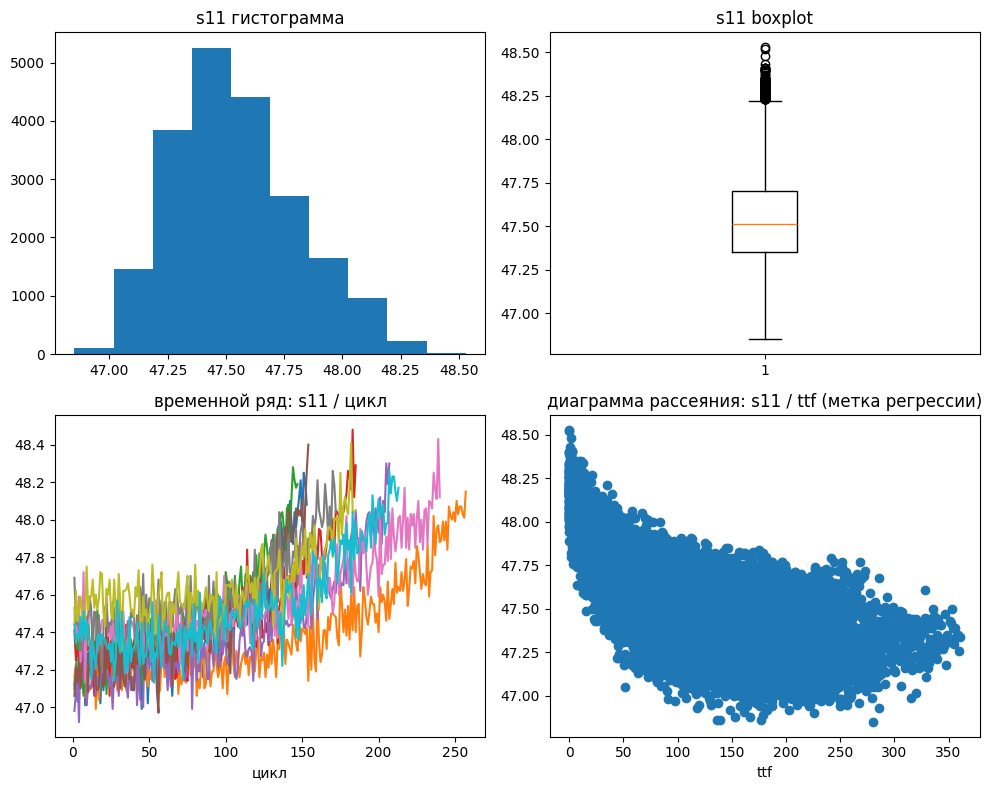

In [39]:
explore_col("s11", 10)

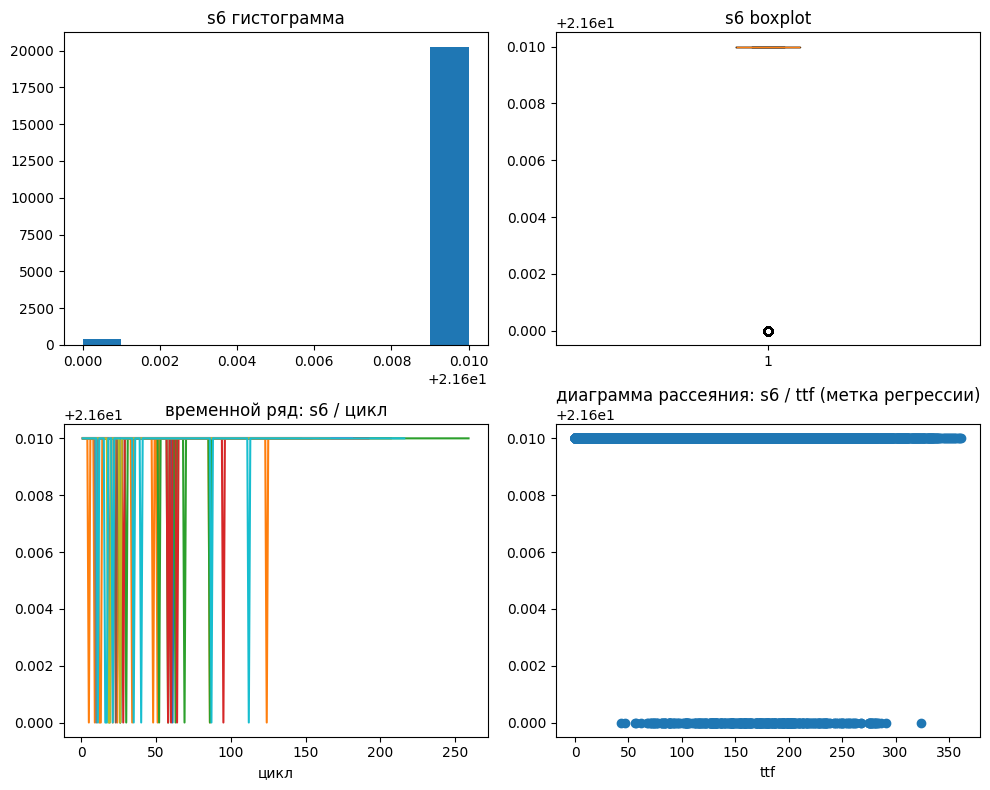

In [40]:
explore_col("s6", 10)

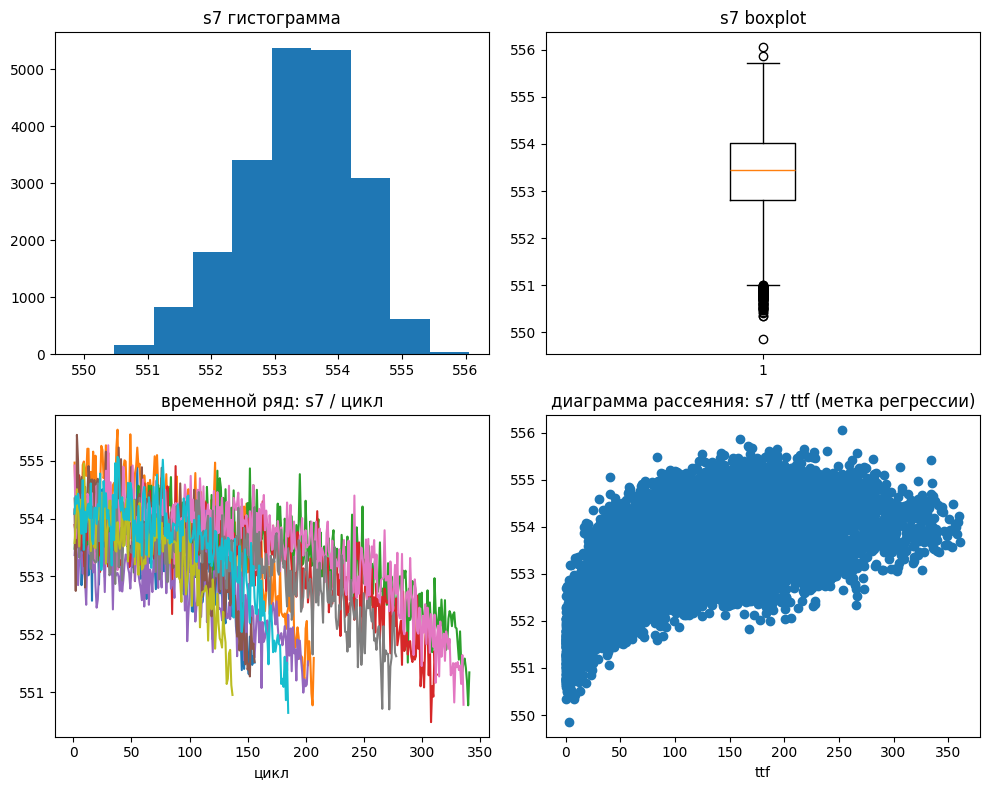

In [41]:
explore_col("s7", 10)

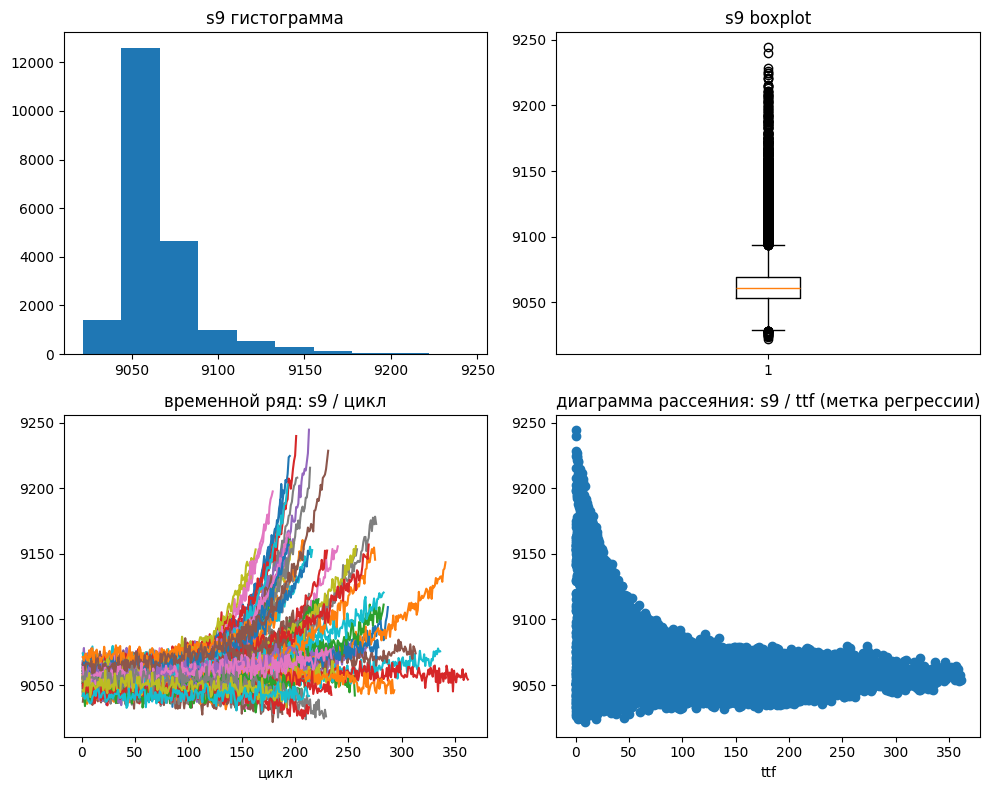

In [42]:
explore_col("s9", 100)

In [43]:

def plot_time_series(s):
    """
    Выводит временной ряд для одного сенсора для 10 случайно выбранных образцов двигателей.

    Args:
        s (str): Имя столбца сенсора, который необходимо отобразить.

    Returns:
        plots
    """

    # Создание нескольких графиков для временного ряда
    fig, axes = plt.subplots(10, 1, sharex=True, figsize=(15, 15))
    fig.suptitle(s + ' временной ряд / цикл', fontsize=15)

    # Генерация случайных образцов двигателей для построения временного ряда
    select_engines = np.random.choice(range(1, 101), 10, replace=False).tolist()

    # Построение временного ряда для каждого выбранного двигателя
    for e_id in select_engines:
        df = df_train[['cycle', s]][df_train.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'], df[s])
        axes[i].set_ylabel('двигатель ' + str(e_id))
        axes[i].set_xlabel('цикл')
        #axes[i].set_title('двигатель ' + str(e_id), loc='right')

    # Настройка отступов между подграфиками
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

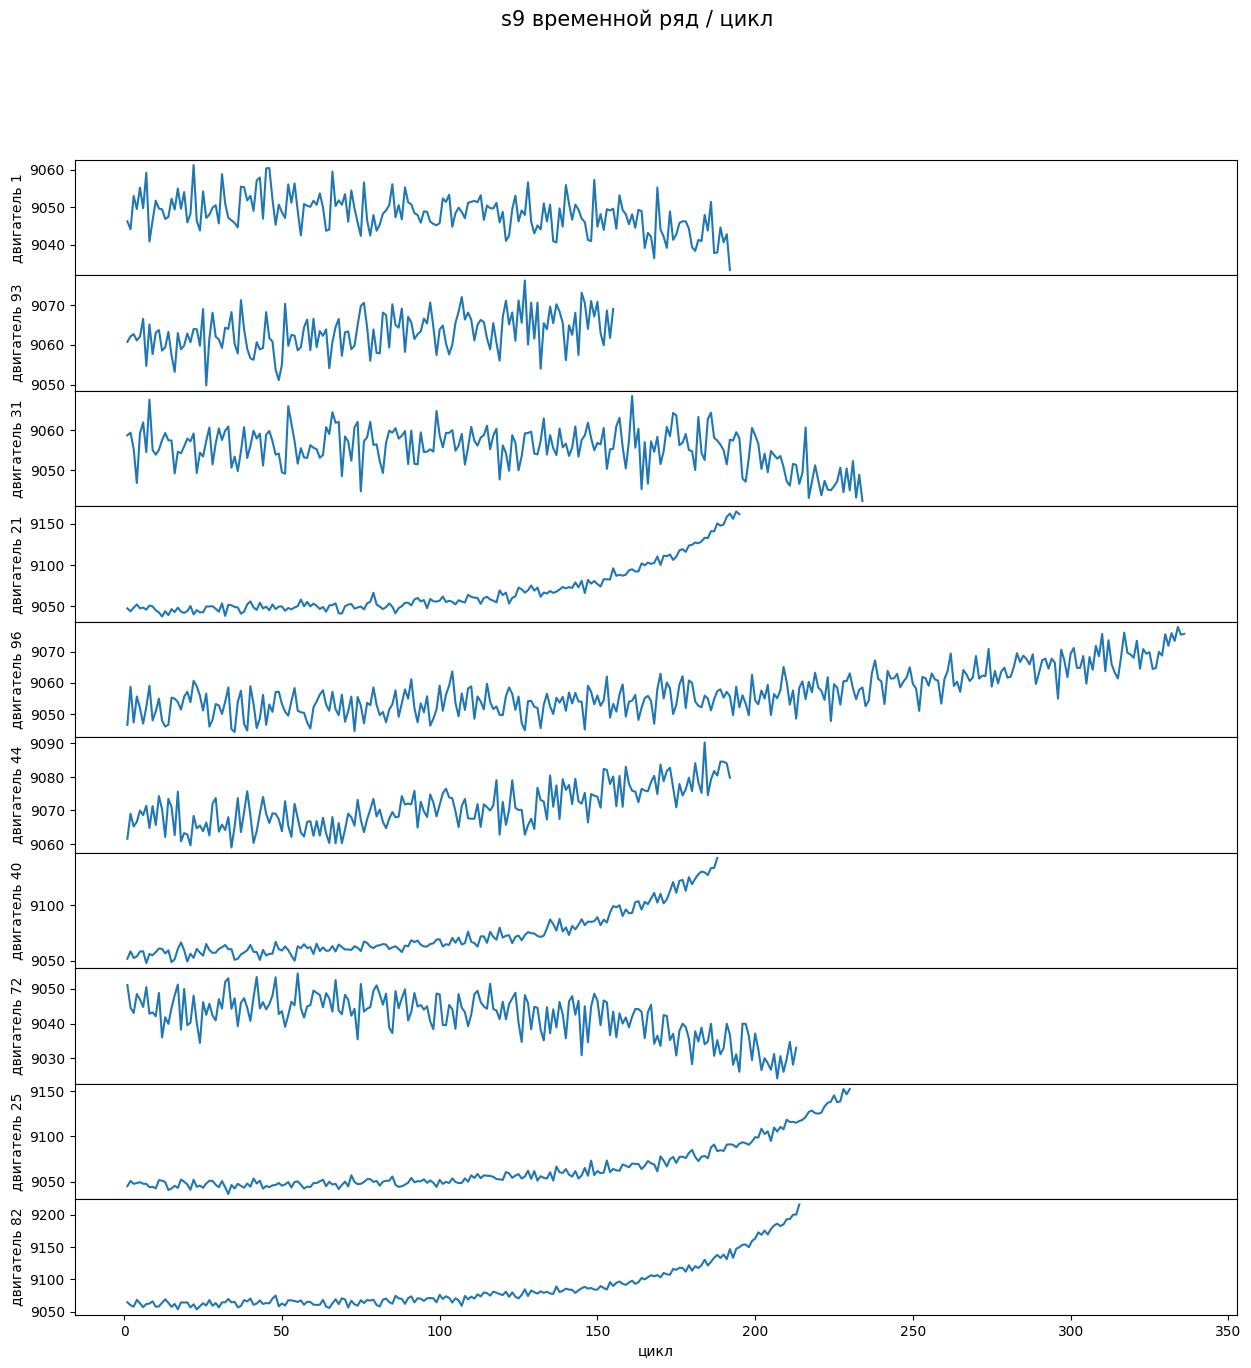

In [44]:
plot_time_series('s9')

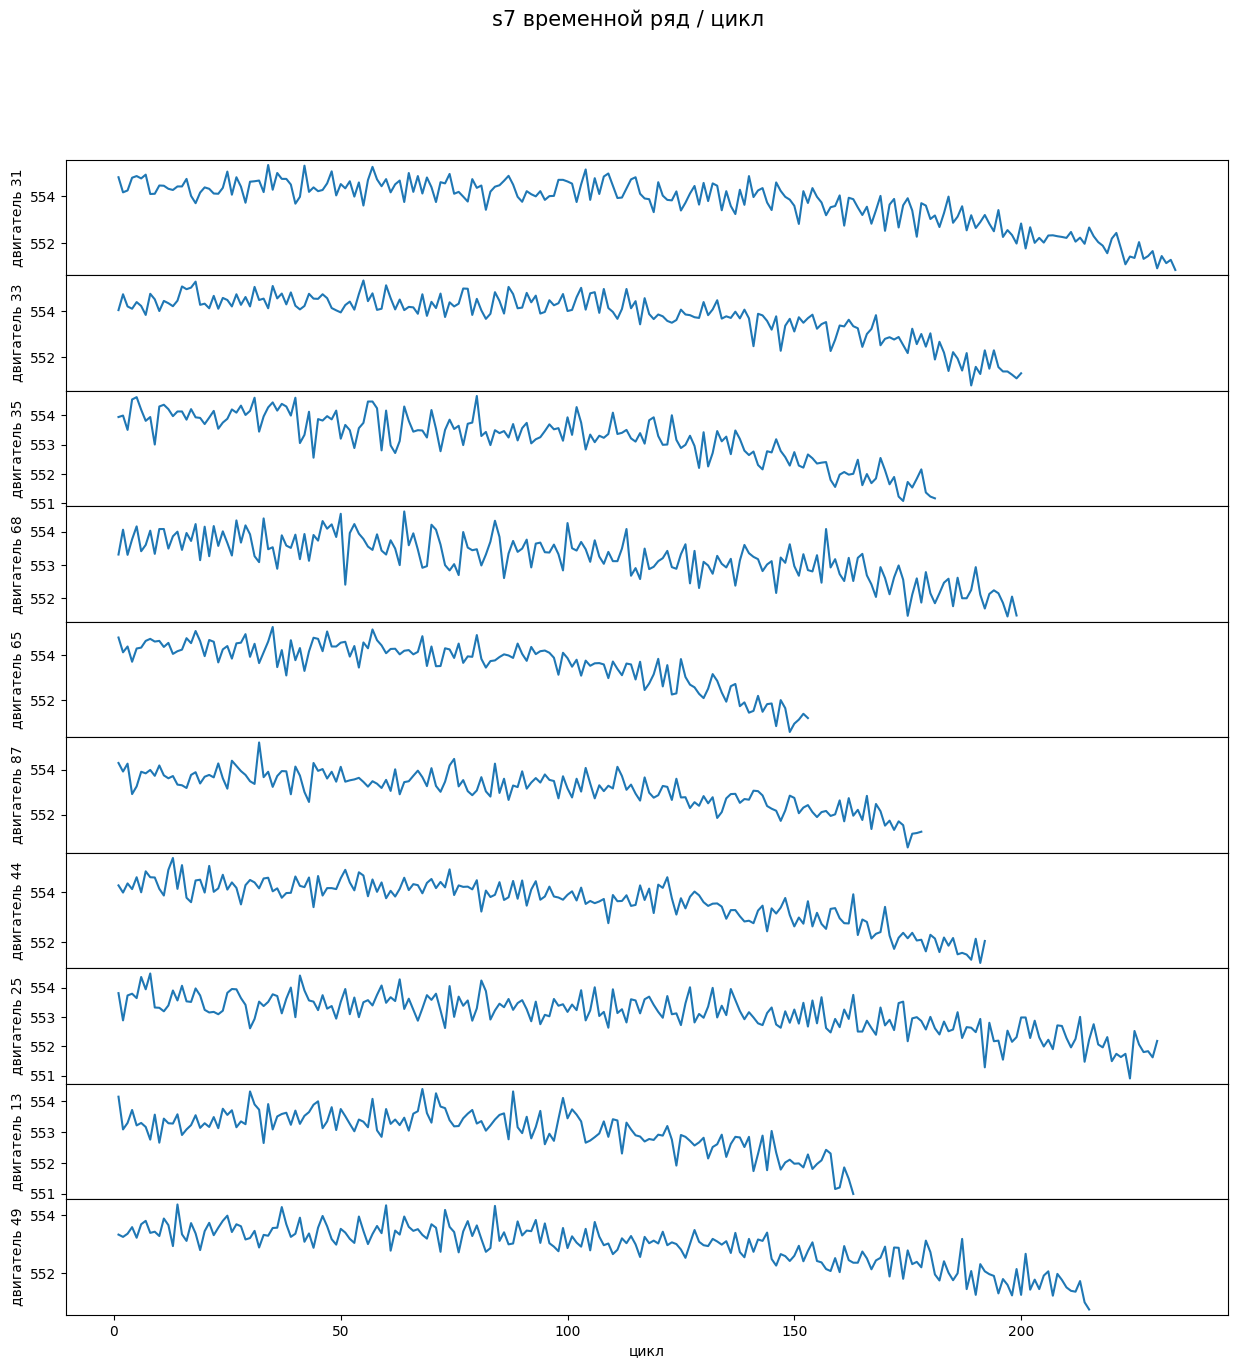

In [45]:
plot_time_series('s7')

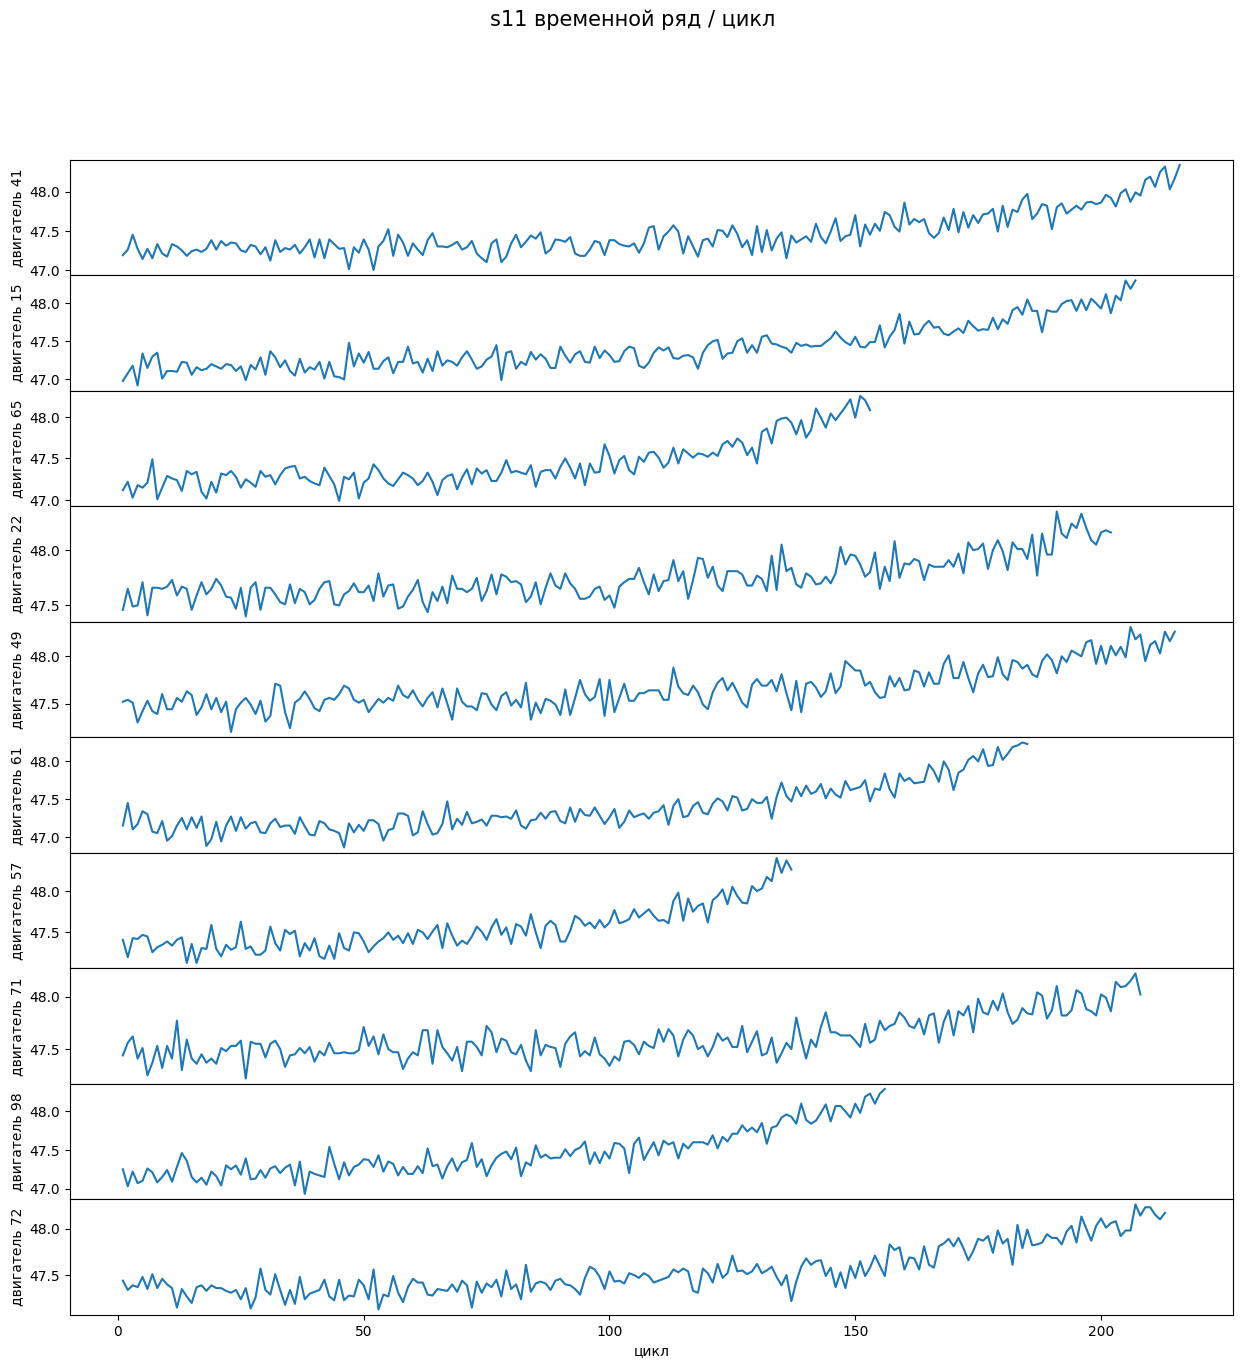

In [46]:
plot_time_series('s11')

### Давайте проверим некоторое состояние на классификационных метках:

In [47]:
# Вывод статистики для метки бинарной классификации

# Вывод количества значений каждого класса в столбце 'label_bnc'
print(df_train['label_bnc'].value_counts())

# Вывод доли отрицательных примеров
print('\nNegaitve samples =  {0:.0%}'.format(df_train['label_bnc'].value_counts()[0] / df_train['label_bnc'].count()))

# Вывод доли положительных примеров
print('\nPosiitve samples =  {0:.0%}'.format(df_train['label_bnc'].value_counts()[1] / df_train['label_bnc'].count()))

label_bnc
0    17531
1     3100
Name: count, dtype: int64

Negaitve samples =  85%

Posiitve samples =  15%


Это явно несбалансированный набор данных, поэтому мы не должны зависеть от точности классификации в качестве показателя производительности модели. Вместо этого мы можем использовать AUC ROC.

In [48]:
# Вывод статистики для мультиклассовой классификационной метки

# Вывод количества значений для каждого класса в столбце 'label_mcc'
print(df_train['label_mcc'].value_counts())

# Вывод доли примеров класса 0 в процентном выражении
print('\nClass 0 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[0] / df_train['label_mcc'].count()))

# Вывод доли примеров класса 1 в процентном выражении
print('\nClass 1 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[1] / df_train['label_mcc'].count()))

# Вывод доли примеров класса 2 в процентном выражении
print('\nClass 2 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[2] / df_train['label_mcc'].count()))

label_mcc
0    17531
2     1600
1     1500
Name: count, dtype: int64

Class 0 samples =  85%

Class 1 samples =  7%

Class 2 samples =  8%


Также, здесь мы должны использовать AUC ROC для оценки классификации.

### Сводка

- Существует очень высокая корреляция (> 0,8) между некоторыми признаками, например (s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 & s12). Такая мультиколлинеарность может снизить производительность некоторых алгоритмов машинного обучения. Таким образом, часть этих объектов будет выбрана для устранения при выборе объектов на этапе моделирования.
- Большинство функций имеют нелинейную связь с TTF, следовательно, добавление их полиномиальных преобразований может повысить производительность моделей.
- Большинство функций имеют нормальное распределение, что, вероятно, улучшает производительность моделей.
- AUC ROC следует использовать для оценки моделей классификации вместо точности из-за дисбаланса классов в обучающих данных.

### Часть 3. Построение моделей для решения задачи бинарной классификации.

In [49]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Создаем серию меток обучающих и тестовых данных.

Создаем наборы признаков, необходимые для разделения исходных фреймов данных на исходные признаки и исходные + извлеченные (агрегированные) признаки

In [50]:
# оригинальные признаки
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# оригинальные + извлеченные признаки
features_extr = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

y_train = df_train['label_bnc']
y_test = df_test['label_bnc']

### Бинарная классификация.

Построим функцию для выполнения настройки гиперпараметров Grid Search на классификаторе.

Grid Search (поиск по сетке) - это метод поиска наилучших гиперпараметров для модели машинного обучения.

In [51]:
def bin_classify(model, clf, features, params=None, score=None):
    """
    Выполняет настройку гиперпараметров Grid Search на классификаторе.

    Args:
        model (str): Идентификатор имени модели
        clf (объект классификатора): Классификатор для настройки
        features (list): Набор имен входных признаков
        params (dict): Параметры Grid Search
        score (str): Оценка Grid Search

    Returns:
        Объект настроенного классификатора
        dataframe с предсказаниями и оценками модели
    """

    # Выделение обучающих данных
    X_train = df_train[features]

    # Выделение тестовых данных
    X_test = df_test[features]

    # Инициализация Grid Search и подгонка модели
    
        # estimator: модель классификатора или регрессора для оценки.
        # param_grid: словарь или список параметров для перебора.
        # cv: количество блоков перекрестной проверки.
        # scoring: метод оценки качества модели.
        # n_jobs: количество процессов для выполнения параллельных вычислений.
    
    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    # Получение оценок вероятности или функции решения, если доступно
    
        # Сначала проверяется, поддерживает ли объект GridSearchCV метод predict_proba.
        # Метод predict_proba возвращается у некоторых моделей, позволяя получить вероятности принадлежности к каждому классу.
        # Если метод поддерживается, то y_score устанавливается как вероятности принадлежности к положительному классу
        # (обычно это индекс 1 возвращаемого массива вероятностей).
    
    if hasattr(grid_search, 'predict_proba'):   
        y_score = grid_search.predict_proba(X_test)[:,1]
        
        # Затем проверяется, поддерживает ли объект GridSearchCV метод decision_function.
        # Метод decision_function возвращает знаковые расстояния до гиперплоскости решения.
        # Если метод поддерживается, то y_score устанавливается как эти расстояния.
        
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
        
        # Если ни один из методов не поддерживается, y_score устанавливается как y_pred, что представляет собой предсказания классификатора.
        
    else:
        y_score = y_pred

    # Создание словаря с предсказаниями и оценками
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)

    return grid_search.best_estimator_, df_predictions

В данном блоке кода определена функция bin_class_metrics, которая вычисляет основные метрики бинарной классификации, а также строит кривые AUC ROC и Precision-Recall. 

In [52]:
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):
    
    """Вычисляет основные метрики бинарной классификации, строит кривые AUC ROC и Precision-Recall.

    Args:
        model (str): Идентификатор модели
        y_test (series): Содержит значения тестовых меток
        y_pred (series): Содержит предсказанные значения
        y_score (series): Содержит предсказанные оценки
        print_out (bool): Вывод метрик классификации и пороговых значений
        plot_out (bool): Построение кривых AUC ROC, Precision-Recall и пороговых кривых

    Returns:
        dataframe: Комбинированные метрики в одном датафрейме
        dataframe: Пороговые значения AUC ROC
        dataframe: Пороговые значения Precision-Recall
        Plot: Кривая AUC ROC
        Plot: Кривая Precision-Recall
        Plot: Пороговая кривая Precision-Recall; также показывает количество двигателей, предсказанных для обслуживания за период (очередь)
        Plot: Пороговая кривая TPR-FPR

    """
      
    # Вычисление основных метрик бинарной классификации
    binclass_metrics = {
        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
        'Precision' : metrics.precision_score(y_test, y_pred),
        'Recall' : metrics.recall_score(y_test, y_pred),
        'F1 Score' : metrics.f1_score(y_test, y_pred),
        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
    }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]  

    # Вычисление ROC кривой
    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []  
    for thr in thresh_roc:  
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
        'Threshold' : thresh_roc,
        'TPR' : tpr,
        'FPR' : fpr,
        'Que' : engines_roc
    }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)

    # Вычисление других метрик классификации
    # TP, FP, TN, FN, TNR, FNR
    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])
    
    df_roc_thresh['Model'] = model

    # Вычисление Precision-Recall кривой
    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)
    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []  
    for thr in thresh_prc:  
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
        'Threshold' : thresh_prc,
        'Precision' : precision,
        'Recall' : recall,
        'Que' : engines_prc
    }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        # Вывод метрик классификации и пороговых значений
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        # Построение кривых AUC ROC и Precision-Recall, а также пороговых кривых
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)
        
        # Частота ложноположительных результатов
        
        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('Частота ложных срабатываний')
        ax1.set_ylabel('Частота положительных срабатываний')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')  
        ax3.plot(thresh_roc, tpr, color='green',label='TPR') 
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines') 
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Порог ROC')  
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall') 
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines') 
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Порог Precision')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh

Используя вышеприведенные функции, давайте смоделируем и оценим некоторые алгоритмы бинарной классификации

__В названиях моделей:__

__B__ означает применение модели к исходному набору признаков, __B__ перед (Before) извлечением признаков
__A__ означает применение модели к исходному набору + извлеченные признаки, __A__ после (After) извлечения признаков

c:\users\danil\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------------------------------------------------------
Logistic Regression B 

Confusion Matrix:
[[75  0]
 [ 9 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        75
           1       1.00      0.64      0.78        25

    accuracy                           0.91       100
   macro avg       0.95      0.82      0.86       100
weighted avg       0.92      0.91      0.90       100


Metrics:
           Logistic Regression B
Accuracy                0.910000
Precision               1.000000
Recall                  0.640000
F1 Score                0.780488
ROC AUC                 0.980800

ROC Thresholds:

      Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0           inf   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1  9.947850e-01   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2  4.323254e-01  17   8  75   0  0.68  0.000000  1.000000  0.903614  0.17
3  4.2

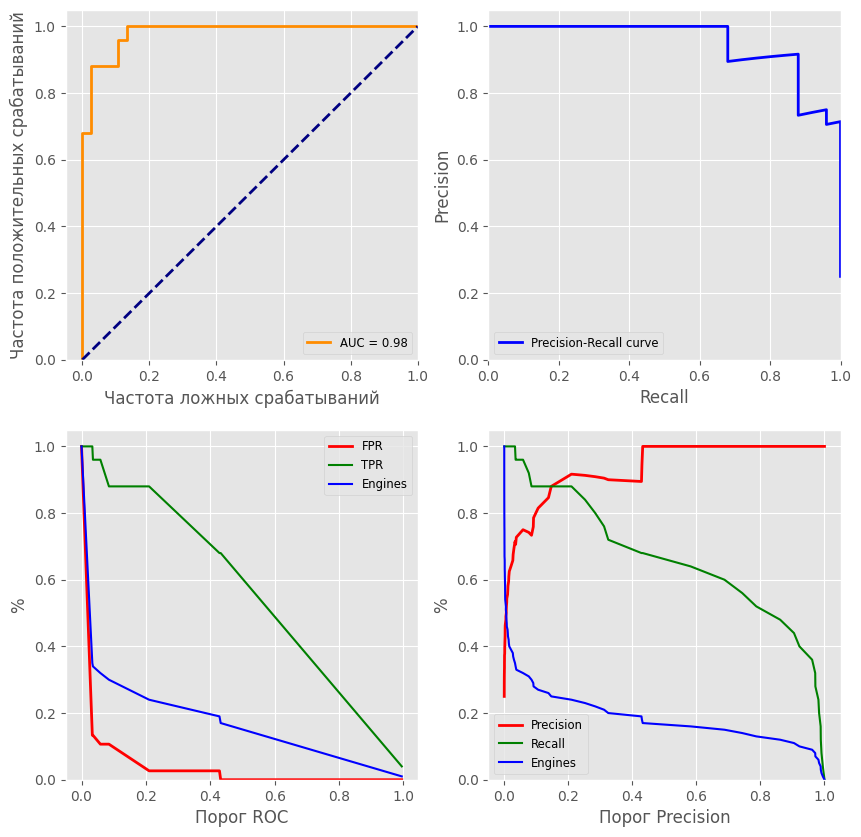

In [53]:
# Задаем модель "Логистическая регрессия B" и инициализируем классификатор LogisticRegression с фиксированным состоянием random_state=123.
model = 'Logistic Regression B'
clf_lgrb = LogisticRegression(random_state=123)

# Определяем параметры для использования в GridSearchCV в функции bin_classify. 
# Здесь используются параметры C и solver для настройки регуляризации и метода оптимизации соответственно.
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

# Вызываем функцию bin_classify для выполнения поиска по сетке и обучения модели с помощью оптимальных параметров.
# Результаты сохраняются в переменных clf_lgrb и pred_lgrb.
clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, features_orig, params=gs_params, score=gs_score)

# Вызываем функцию bin_class_metrics для вычисления основных метрик классификации на основе предсказанных результатов. 
# Метрики сохраняются в переменных metrics_lgrb, roc_lgrb и prc_lgrb.
metrics_lgrb, roc_lgrb, prc_lgrb = bin_class_metrics(model, y_test, pred_lgrb.y_pred, pred_lgrb.y_score, print_out=True, plot_out=True)

# Выводим лучшие параметры модели.
print('\nЛучшие параметры:\n', clf_lgrb)

Двигатели на приведенных выше диаграммах представляют очередь или количество двигателей, подлежащих обслуживанию за период, т.е. мощность технического обслуживания.

__Здесь должны были быть выводы по бинарной классификации и собсна мультклассовая классификация, но мне лень и у меня лапки, поэтому переходим сразу к задаче регрессии...__

### Построение регрессионной модели

In [54]:
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.feature_selection import SelectFromModel, RFECV

In [55]:
# Подготовка данных для регрессионной модели

# Оригинальные признаки
features_orig = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

# Оригинальные + извлеченные признаки
features_adxf = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

# Признаки с низкой или отсутствующей корреляцией с целевой переменной
features_lowcr = ['setting3', 's1', 's10', 's18', 's19', 's16', 's5', 'setting1', 'setting2']

# Признаки с корреляцией с целевой переменной
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']

# Переменная для хранения выбора признаков для экспериментов
features = features_orig  # Выбор оригинальных признаков для экспериментов

# Обучающие данные
X_train = df_train[features]  # Признаки для обучения
y_train = df_train['ttf']  # Целевая переменная для обучения

# Тестовые данные
X_test = df_test[features]  # Признаки для тестирования
y_test = df_test['ttf']  # Целевая переменная для тестирования

__Создаем вспомогательную функцию для вычисления метрик регрессии__

In [56]:
def get_regression_metrics(model, actual, predicted):
    
    """Вычисляет основные метрики регрессии.
    
    Args:
        model (str): Идентификатор названия модели
        actual (series): Содержит фактические значения меток теста
        predicted (series): Содержит предсказанные значения
        
    Returns:
        dataframe: Объединенные метрики в одном фрейме данных
    
    """
    # Словарь для хранения метрик регрессии
    regr_metrics = {
        'Root Mean Squared Error': metrics.mean_squared_error(actual, predicted) ** 0.5,
        'Mean Absolute Error': metrics.mean_absolute_error(actual, predicted),
        'R^2': metrics.r2_score(actual, predicted),
        'Explained Variance': metrics.explained_variance_score(actual, predicted)
    }

    # Создаем DataFrame из словаря метрик
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    
    # Задаем название столбца как имя модели
    df_regr_metrics.columns = [model]
    
    return df_regr_metrics

__Создаем вспомогательную функцию для построения графика весов коэффициентов или важности признаков__

In [57]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Строит график весов коэффициентов регрессии или важности признаков.
    
    Args:
        model (str): Идентификатор названия модели
        weights (array): Содержит веса коэффициентов регрессии или важности признаков
        feature_names (list): Содержит соответствующие имена признаков
        weights_type (str): 'c' для 'весов коэффициентов', в противном случае - 'важность признаков'
        
    Returns:
        График весов коэффициентов регрессии или важности признаков
    
    """
    # Определение размеров графика в зависимости от количества признаков
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    
    # Создание DataFrame из весов и имен признаков
    W = pd.DataFrame({'Weights': weights}, feature_names)
    
    # Построение горизонтальной столбчатой диаграммы
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px, py))
    
    # Определение подписи в зависимости от типа весов
    label = ' Coefficients' if weights_type == 'c' else ' Features Importance'
    
    # Установка подписи оси x и удаление легенды
    plt.xlabel(model + label)
    plt.gca().legend_ = None

__Создаем вспомогательную функцию для построения графика остатков регрессии__

In [58]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Выводит график остатков регрессии.
    
    Args:
        model (str): Идентификатор названия модели
        y_train (series): Обучающие метки
        y_train_pred (series): Прогнозы на обучающих данных
        y_test (series): Тестовые метки
        y_test_pred (series): Прогнозы на тестовых данных
        
    Returns:
        График остатков регрессии
    
    """
    
    # Рассеиваемые диаграммы остатков для обучающих и тестовых данных
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    
    # Настройка подписей и легенды
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    
    # Горизонтальная линия на уровне 0 (для отображения точек вокруг 0)
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    
    # Название графика
    plt.title(model + ' Residuals')
    
    # Отображение графика
    plt.show()

__Используем вышеописанные функции для моделирования и оценки регрессионных алгоритмов__

In [60]:
# Пробуем линейную регрессию
linreg = linear_model.LinearRegression()  # Создание объекта линейной регрессии
linreg.fit(X_train, y_train)  # Обучение модели на обучающих данных

# Предсказания на тестовых и обучающих данных
y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

# Вывод коэффициентов детерминации R^2 для обучающих и тестовых данных
print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

# Получение метрик регрессии для линейной регрессии
linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)

# Вывод метрик регрессии
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


Linear Regression
Root Mean Squared Error          32.041095
Mean Absolute Error              25.591780
R^2                               0.405495
Explained Variance                0.665297

In [61]:
X_train

setting1  setting2  setting3      s1      s2       s3       s4     s5  \
0       -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60  14.62   
1        0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14  14.62   
2       -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20  14.62   
3        0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87  14.62   
4       -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22  14.62   
...         ...       ...       ...     ...     ...      ...      ...    ...   
20626   -0.0004   -0.0003     100.0  518.67  643.49  1597.98  1428.63  14.62   
20627   -0.0016   -0.0005     100.0  518.67  643.54  1604.50  1433.58  14.62   
20628    0.0004    0.0000     100.0  518.67  643.42  1602.46  1428.18  14.62   
20629   -0.0011    0.0003     100.0  518.67  643.23  1605.26  1426.53  14.62   
20630   -0.0032   -0.0005     100.0  518.67  643.85  1600.38  1432.14  14.62   

          s6      s7  ...     s12      s13      s14     s15   s16  s17   s18  \
0      21.61  554.36  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388   
1      21.61  553.75  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388   
2      21.61  554.26  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388   
3      21.61  554.45  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388   
4      21.61  554.00  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388   
...      ...     ...  ...     ...      ...      ...     ...   ...  ...   ...   
20626  21.61  551.43  ...  519.49  2388.26  8137.60  8.4956  0.03  397  2388   
20627  21.61  550.86  ...  519.68  2388.22  8136.50  8.5139  0.03  395  2388   
20628  21.61  550.94  ...  520.01  2388.24  8141.05  8.5646  0.03  398  2388   
20629  21.61  550.68  ...  519.67  2388.23  8139.29  8.5389  0.03  395  2388   
20630  21.61  550.79  ...  519.30  2388.26  8137.33  8.5036  0.03  396  2388   

         s19    s20      s21  
0      100.0  39.06  23.4190  
1      100.0  39.00  23.4236  
2      100.0  38.95  23.3442  
3      100.0  38.88  23.3739  
4      100.0  38.90  23.4044  
...      ...    ...      ...  
20626  100.0  38.49  22.9735  
20627  100.0  38.30  23.1594  
20628  100.0  38.44  22.9333  
20629  100.0  38.29  23.0640  
20630  100.0  38.37  23.0522  

[20631 rows x 24 columns]